# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [2]:
# ETAPA 1 - IMPORTAÇÃO, CARREGAMENTO E DEFINIÇÃO DE X E Y

# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# CARREGAMENTO DA BASE DE DADOS
caminho_arquivo = "ALUGUEL_MOD12.csv"
df_aluguel = pd.read_csv(caminho_arquivo, sep=";")

print("Prévia da base de dados:")
print(df_aluguel.head())


# DEFINIÇÃO DA VARIÁVEL ALVO (y)
variavel_alvo = "Valor_Aluguel"
y = df_aluguel[variavel_alvo]


# DEFINIÇÃO DA VARIÁVEL PREDITORA (X)
variavel_preditor = "Metragem"
X = df_aluguel[[variavel_preditor]]

print("\nFormato de X (variável preditora):", X.shape)
print("Formato de y (variável alvo):", y.shape)


Prévia da base de dados:
   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  

Formato de X (variável preditora): (7203, 1)
Formato de y (variável alvo): (7203,)


# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [3]:
# ETAPA 2 - TRANSFORMAÇÃO POLINOMIAL COM DEGREE = 2

# CRIAÇÃO DO OBJETO POLYNOMIALFEATURES
poly = PolynomialFeatures(degree=2, include_bias=False)

# TRANSFORMAÇÃO DA VARIÁVEL PREDITORA
X_poly = poly.fit_transform(X)

# INSPEÇÃO DO FORMATO DOS DADOS TRANSFORMADOS
print("Formato original de X:", X.shape)
print("Formato de X_poly (polinomial):", X_poly.shape)

# INSPEÇÃO DOS NOMES DAS FEATURES GERADAS
nomes_features = poly.get_feature_names_out([variavel_preditor])
print("Features polinomiais geradas:", nomes_features)


Formato original de X: (7203, 1)
Formato de X_poly (polinomial): (7203, 2)
Features polinomiais geradas: ['Metragem' 'Metragem^2']


# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [4]:
# ETAPA 3 - SEPARAÇÃO TREINO/TESTE E TREINAMENTO DO MODELO

# SEPARAÇÃO ENTRE TREINO E TESTE
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_poly,
    y,
    test_size=0.2,
    random_state=42
)

# CRIAÇÃO E TREINAMENTO DO MODELO
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_treino, y_treino)

# INSPEÇÃO DOS PARÂMETROS DO MODELO
print("Intercepto do modelo:", modelo_regressao.intercept_)
print("Coeficientes do modelo:", modelo_regressao.coef_)


Intercepto do modelo: -632.135305487061
Coeficientes do modelo: [ 4.42826866e+01 -2.89778247e-02]


#4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

MSE (Erro Quadrático Médio): 4645995.564626078
RMSE (Raiz do Erro Quadrático Médio): 2155.4571590792702
R² (Coeficiente de Determinação): 0.571053804409964


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


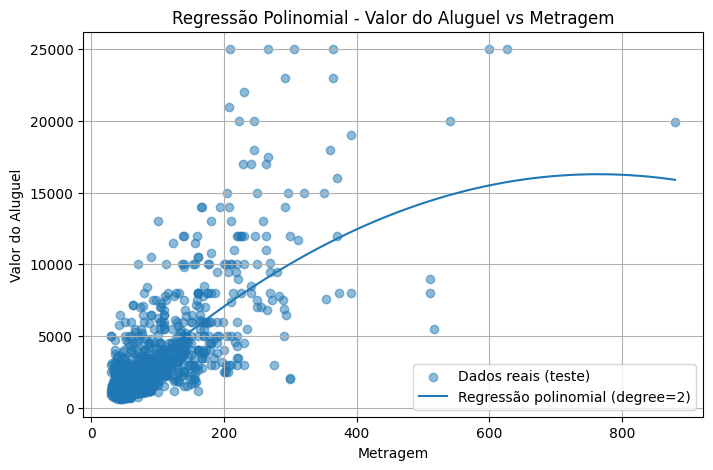

In [5]:
# ETAPA 4 - PREVISÕES, AVALIAÇÃO DO MODELO E GRÁFICO DE REGRESSÃO

# CÁLCULO DAS PREVISÕES NO CONJUNTO DE TESTE
y_pred = modelo_regressao.predict(X_teste)

# AVALIAÇÃO DO MODELO NO CONJUNTO DE TESTE
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

print("MSE (Erro Quadrático Médio):", mse)
print("RMSE (Raiz do Erro Quadrático Médio):", rmse)
print("R² (Coeficiente de Determinação):", r2)

# PREPARAÇÃO DOS DADOS PARA O GRÁFICO
metragem_teste = X_teste[:, 0]
metragem_grid = np.linspace(metragem_teste.min(), metragem_teste.max(), 100).reshape(-1, 1)
metragem_grid_poly = poly.transform(metragem_grid)
y_grid_pred = modelo_regressao.predict(metragem_grid_poly)

# PLOTAGEM DO GRÁFICO DE REGRESSÃO
plt.figure(figsize=(8, 5))
plt.scatter(metragem_teste, y_teste, label="Dados reais (teste)", alpha=0.5)
plt.plot(metragem_grid, y_grid_pred, label="Regressão polinomial (degree=2)")
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regressão Polinomial - Valor do Aluguel vs Metragem")
plt.legend()
plt.grid(True)
plt.show()


# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

MSE (degree 4): 4782486.108143623
RMSE (degree 4): 2186.88959669747
R² (degree 4): 0.5584521782221052


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


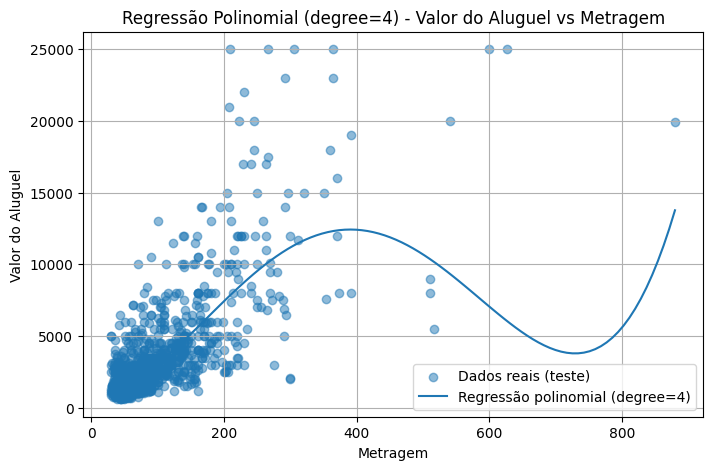


COMPARAÇÃO ENTRE MODELOS:
R² degree 2: 0.571053804409964
R² degree 4: 0.5584521782221052
RMSE degree 2: 2155.4571590792702
RMSE degree 4: 2186.88959669747


In [6]:
# ETAPA 5 - MODELO POLINOMIAL COM DEGREE = 4 E COMPARAÇÃO COM DEGREE = 2

# PROCESSAMENTO POLINOMIAL DEGREE 4
poly_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_4.fit_transform(X)

# SEPARAÇÃO TREINO/TESTE DEGREE 4
X_treino_4, X_teste_4, y_treino_4, y_teste_4 = train_test_split(
    X_poly_4,
    y,
    test_size=0.2,
    random_state=42
)

# TREINAMENTO DO MODELO DEGREE 4
modelo_regressao_4 = LinearRegression()
modelo_regressao_4.fit(X_treino_4, y_treino_4)

# PREVISÕES E MÉTRICAS DO MODELO DEGREE 4
y_pred_4 = modelo_regressao_4.predict(X_teste_4)

mse_4 = mean_squared_error(y_teste_4, y_pred_4)
rmse_4 = np.sqrt(mse_4)
r2_4 = r2_score(y_teste_4, y_pred_4)

print("MSE (degree 4):", mse_4)
print("RMSE (degree 4):", rmse_4)
print("R² (degree 4):", r2_4)

# GRÁFICO DE REGRESSÃO DEGREE 4
metragem_teste_4 = X_teste_4[:, 0]
metragem_grid_4 = np.linspace(metragem_teste_4.min(), metragem_teste_4.max(), 100).reshape(-1, 1)
metragem_grid_poly_4 = poly_4.transform(metragem_grid_4)
y_grid_pred_4 = modelo_regressao_4.predict(metragem_grid_poly_4)

plt.figure(figsize=(8, 5))
plt.scatter(metragem_teste_4, y_teste_4, label="Dados reais (teste)", alpha=0.5)
plt.plot(metragem_grid_4, y_grid_pred_4, label="Regressão polinomial (degree=4)")
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.title("Regressão Polinomial (degree=4) - Valor do Aluguel vs Metragem")
plt.legend()
plt.grid(True)
plt.show()

# COMPARAÇÃO ENTRE MODELOS DEGREE 2 VS DEGREE 4
print("\nCOMPARAÇÃO ENTRE MODELOS:")
print("R² degree 2:", r2)
print("R² degree 4:", r2_4)
print("RMSE degree 2:", rmse)
print("RMSE degree 4:", rmse_4)


Ao comparar os dois modelos de regressão polinomial, observamos que o modelo com degree = 2 apresentou desempenho ligeiramente superior ao modelo com degree = 4. O R² do modelo de grau 2 foi de aproximadamente 0,57, enquanto o modelo de grau 4 obteve um R² em torno de 0,56, indicando que o modelo mais simples explica uma fração um pouco maior da variabilidade do valor do aluguel.
Além disso, o RMSE também foi menor no modelo de degree = 2 (≈ 2155,46) em comparação ao modelo de degree = 4 (≈ 2186,89), o que mostra que, em média, as previsões do modelo de grau 2 ficam mais próximas dos valores reais do que as do modelo de grau 4.
Na prática, isso sugere que aumentar o grau do polinômio não trouxe ganho de desempenho para este problema específico. Pelo contrário, o modelo de grau 4 tende a ser mais complexo, com maior risco de sobreajuste (overfitting), sem melhorar a capacidade de generalização nos dados de teste. Diante disso, o modelo polinomial com degree = 2 é a escolha mais apropriada, por alcançar um equilíbrio melhor entre desempenho e simplicidade.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Ridge, Lasso e Elastic Net são três tipos de regressão com regularização, ou seja, modelos que colocam uma “penalidade” nos coeficientes para controlar complexidade e evitar overfitting.
Na Ridge, a penalização é do tipo L2 (quadrado dos coeficientes): ela encolhe os coeficientes, mas raramente zera algum; é boa quando todas as variáveis têm alguma importância e estão correlacionadas.
Na Lasso, a penalização é do tipo L1 (valor absoluto dos coeficientes): além de encolher, ela pode zerar completamente alguns coeficientes, funcionando como uma espécie de seleção automática de variáveis (feature selection).
A Elastic Net combina as duas penalizações (L1 + L2), tentando juntar o melhor dos dois mundos: consegue fazer seleção de variáveis como o Lasso, mas com mais estabilidade em cenários com muitas features correlacionadas, como o Ridge.